In [1]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint
from sklearn.metrics import precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish['Species'].unique() # ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
fish.head(2)
fish.columns # ['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width']
# fish = fish.loc[(fish['Species']=='Bream') | (fish['Species']=='Smelt')] #Bream, Smelt 두개만 , 이진분류
fish1 = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
print(type(fish1))# <class 'pandas.core.frame.DataFrame'>
fish2 = fish1.values
print(type(fish2)) # <class 'numpy.ndarray'>
fish3 = fish['Species'].values
fish['Species'].unique()
X_train, X_test, y_train, y_test = train_test_split(fish2, fish3, random_state=42)
# StandardScaler 객체 생성   # : 결정 트리에서는 무의미하네. 어찌보면 더 구려짐
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

# 기본 모델로 결정 트리 사용
base_model = DecisionTreeClassifier(min_impurity_decrease=0.0001, max_depth=4, random_state=42)

# AdaBoost 모델 생성
model = AdaBoostClassifier(base_model, n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Stacking Model Accuracy: {accuracy}")
print(precision_score(y_test, y_pred, average=None))


<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
Stacking Model Accuracy: 0.8
[1.   1.   0.8  1.   0.25 1.   1.  ]


In [ ]:


# 기본 모델로 결정 트리 사용
base_model = DecisionTreeClassifier(max_depth=1)

# AdaBoost 모델 생성
model = AdaBoostClassifier(base_model, n_estimators=50)
model.fit(X_train, y_train)


In [16]:
import tensorflow as tf
import pandas as pd
Sequential = tf.keras.Sequential # 모델
Dense = tf.keras.layers.Dense # 뉴런
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

4/4 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8571
Loss: 0.3715362548828125, Accuracy: 0.8571428656578064
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 10)                60        
                                                                 
 dense_64 (Dense)            (None, 5)                 55        
                                                                 
 dense_65 (Dense)            (None, 10)                60        
                                                                 
 dense_66 (Dense)            (None, 5)                 55        
                                                                 
 dense_67 (Dense)            (None, 10)                60        
                                                                 
 dense_68 (Dense)            (None, 5)        

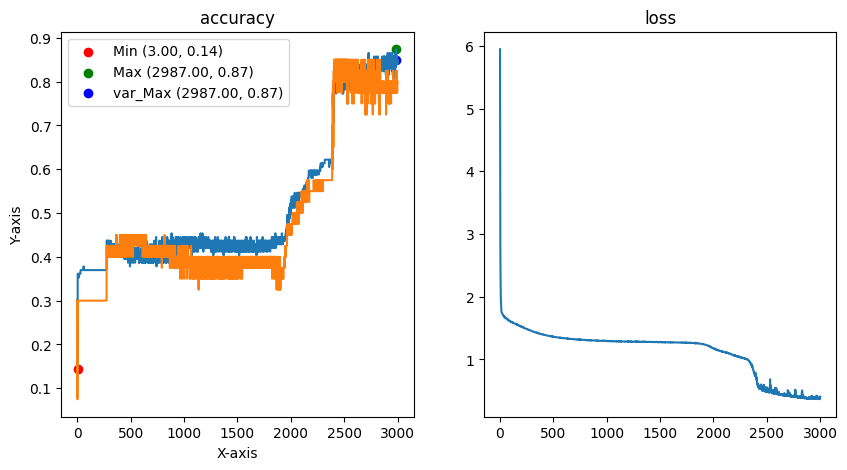

In [28]:

df = pd.read_csv('http://bit.ly/fish_csv_data')
fish['Species'].unique() # ['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt']
fish.head(2)
fish.columns # ['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width']
# fish = fish.loc[(fish['Species']=='Bream') | (fish['Species']=='Smelt')] #Bream, Smelt 두개만 , 이진분류
fish1 = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']]
print(type(fish1))# <class 'pandas.core.frame.DataFrame'>
# fish2 = fish1.values
print(type(fish2)) # <class 'numpy.ndarray'>
fish3 = fish['Species']
fish['Species'].unique()

category_name = 'Species'
unique_values = df[category_name].unique()
df[category_name] = df[category_name].replace(df[category_name].unique(), np.array(range(1, len(df[category_name].unique())+1) )**2 )
df = pd.get_dummies(df, columns=[category_name], dtype=int)
X_train = df.iloc[:, 0:5]
# y_train = df['species']
y_train = df.iloc[:, 5:]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, random_state=42)


input_num = 5
output_num = 7
epoch_count = 3001

model = Sequential()
model.add(Dense(input_num * 2, input_shape=(input_num,), activation='relu'))
model.add(Dense(input_num, activation='relu')) # 은닉층의 수가 줄어드니까 더 잘나오나?
model.add(Dense(input_num * 2, activation='relu'))
model.add(Dense(input_num, activation='relu'))
model.add(Dense(input_num * 2, activation='relu'))
model.add(Dense(input_num, activation='relu'))
model.add(Dense(input_num * 2, activation='relu'))
model.add(Dense(input_num, activation='relu'))
# model.add(Dense(4, activation='relu'))
model.add(Dense(output_num, activation='softmax')) #softmax  sigmoid
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # binary_crossentropy sparse_categorical_crossentropy categorical_crossentropy

epochs = range(1,epoch_count)
accuracy_arr = []
val_accuracy_arr = []
loss_arr = []
for epoch in epochs:
    history = model.fit(X_train, y_train, epochs=1, verbose=1, validation_data=(X_test, y_test))
    # history = model.fit(x_train, y_train, epochs=1, verbose=1, shuffle=True, validation_split=0.2)
    # 가중치와 편향 출력
    weights, biases = model.layers[0].get_weights()
    clear_output(wait=True) # clear_screen()
    print("에포크 (epoch):\n", epoch)
    # print("편향 (Biases):\n", biases)
    # print("가중치 (Weights):\n", weights)
    
    accuracy = history.history['accuracy'][0]
    accuracy_arr.append(accuracy)
    val_accuracy_arr.append(history.history['val_accuracy'][0])
    loss_arr.append(history.history['loss'])
    print("정확도 (Biases):\n", accuracy)
    if accuracy == 1.0 and epochs > 10 :
        print(f"정확도가 100%에 도달한 에포크: {epoch + 1}")
        break
clear_output(wait=True)
loss, accuracy = model.evaluate(X_train, y_train)
print(f'Loss: {loss}, Accuracy: {accuracy}')
model.summary()


# 서브플롯 생성
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 서브플롯


# 최소값과 최대값 표시
min_y, max_y = min(accuracy_arr), max(accuracy_arr)
min_x = epochs[np.argmin(accuracy_arr)]
max_x = epochs[np.argmax(accuracy_arr)]
max_val_y = max(val_accuracy_arr)

# 최소값과 최대값을 그래프에 표시
ax1.scatter(min_x, min_y, color='red', label=f'Min ({min_x:.2f}, {min_y:.2f})')
ax1.scatter(max_x, max_y, color='green', label=f'Max ({max_x:.2f}, {max_y:.2f})')
ax1.scatter(max_x, max_val_y, color='blue', label=f'var_Max ({max_x:.2f}, {max_y:.2f})')

# 레이블 및 범례 추가
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.legend()

# 첫 번째 서브플롯 (왼쪽)
ax1.plot(epochs, accuracy_arr)
ax1.plot(epochs, val_accuracy_arr)
ax1.set_title("accuracy")

# 두 번째 서브플롯 (오른쪽)
ax2.plot(epochs, loss_arr)
ax2.set_title("loss")
plt.show()

In [22]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB
